# 1. Set-up

In [167]:
import math 
import tqdm
import tqdm.notebook
import random
from typing import List, Tuple, Callable, TypeVar
import numpy as np
import scipy.stats as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.outliers_influence
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

## Example data

In [194]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter = ';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [195]:
sm.datasets.randhie.load_pandas().data

,mdvis,lncoins,idp,lpi,fmde,physlm,disea,hlthg,hlthf,hlthp
0,0,4.615120,1,6.907755,0.000000,0.000000,13.73189,1,0,0
1,2,4.615120,1,6.907755,0.000000,0.000000,13.73189,1,0,0
2,0,4.615120,1,6.907755,0.000000,0.000000,13.73189,1,0,0
3,0,4.615120,1,6.907755,0.000000,0.000000,13.73189,1,0,0
4,0,4.615120,1,6.907755,0.000000,0.000000,13.73189,1,0,0
...,...,...,...,...,...,...,...,...,...,...
20185,2,0.000000,0,5.377498,0.000000,0.144292,10.57626,0,0,0
20186,0,0.000000,0,5.377498,0.000000,0.144292,10.57626,0,0,0
20187,8,3.258096,0,6.874819,8.006368,0.144292,10.57626,0,0,0
20188,8,3.258096,0,5.156178,6.542472,0.144292,10.57626,0,0,0


In [196]:
print(sm.datasets.randhie.NOTE)

::

    Number of observations - 20,190
    Number of variables - 10
    Variable name definitions::

        mdvis   - Number of outpatient visits to an MD
        lncoins - ln(coinsurance + 1), 0 <= coninsurance <= 100
        idp     - 1 if individual deductible plan, 0 otherwise
        lpi     - ln(max(1, annual participation incentive payment))
        fmde    - 0 if idp = 1; ln(max(1, MDE/(0.01 coinsurance))) otherwise
        physlm  - 1 if the person has a physical limitation
        disea   - number of chronic diseases
        hlthg   - 1 if self-rated health is good
        hlthf   - 1 if self-rated health is fair
        hlthp   - 1 if self-rated health is poor
        (Omitted category is excellent self-rated health)



# 2. Linear algebra

## Vectors

In [4]:
Vector = List[float]

height_weight_age = [70,170,40]
grades = [95,80,75,62]

In [5]:
def add(v: Vector, w: Vector) -> Vector:
    '''Adds corresponding elements'''
    assert len(v) == len(w), 'vectors must be the same length'
    return [v_i + w_i for v_i, w_i in zip(v, w)]
assert add([1,2,3], [4,5,6]) == [5,7,9]

In [6]:
def subtract(v: Vector, w: Vector) -> Vector:
    '''Subtracts corresponsing elements'''
    assert len(v) == len(w), 'vectors must be the same length'
    return [v_i - w_i for v_i, w_i in zip(v, w)]
assert subtract([5,7,9], [4,5,6]) == [1,2,3]

In [7]:
def vector_sum(vectors: List[Vector]) -> Vector:
    '''Sums all corresponding elements'''
    # check that vectors is not empty 
    assert vectors, 'no vectors provided'
    
    # check the vectors are all the same size
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), 'different sizes'
    
    # the i-th element of the result is the sum of every vector[i]
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]
assert vector_sum([[1,2],[3,4],[5,6],[7,8]]) == [16,20]

In [8]:
sum([np.array([1,2]),np.array([3,4]),np.array([5,6]),np.array([7,8])])

array([16, 20])

In [9]:
def scalar_multiply(c: float, v: Vector) -> Vector:
    '''Multiplies every element by c'''
    return [c * v_i for v_i in v]
assert scalar_multiply(2, [1,2,3]) == [2,4,6]

In [10]:
np.array([1,2,3]) * 2

array([2, 4, 6])

In [11]:
def vector_mean(vectors: List[Vector]) -> Vector:
    '''Computes the element-wise average'''
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))
assert vector_mean([[1,2],[3,4],[5,6]]) == [3,4]

In [12]:
np.mean(np.array([1,2,3,4,5,6]).reshape(3,2), axis = 0)

array([3., 4.])

In [13]:
def dot(v: Vector, w: Vector) -> float:
    '''Computes dot product'''
    assert len(v) == len(w), 'vectors must be same length'
    
    return sum(v_i * w_i for v_i, w_i in zip(v, w))
assert dot([1,2,3],[4,5,6]) == 1 * 4 + 2 * 5 + 3 * 6

In [14]:
def sum_of_squares(v: Vector) -> float:
    '''Returns sum of squares of a vector'''
    return dot(v, v)
assert sum_of_squares([1,2,3]) == 1 ** 2 + 2 ** 2 + 3 ** 2

In [15]:
def magnitude(v: Vector) -> float:
    '''Returns the magnitude (or length) of vector'''
    return math.sqrt(sum_of_squares(v))
assert magnitude([3,4]) == 5

In [16]:
def squared_distance(v: Vector, w: Vector) -> float:
    '''Returns squared distance of two vectors'''
    return sum_of_squares(subtract(v, w))

In [17]:
def distance(v: Vector, w: Vector) -> float:
    '''Returns the distance between two vectors'''
    return math.sqrt(squared_distance(v, w))

In [18]:
def distance(v: Vector, w: Vector) -> float:
    return magnitude(subtract(v, w))
assert distance([1,2],[2,3]) == math.sqrt((1-2)**2 + (2-3)**2)

## Matrices

In [19]:
Matrix = List[List[float]]

A = [[1,2,3],[4,5,6]]
B = [[1,2],[3,4],[5,6]]

In [20]:
def shape(A: Matrix) -> Tuple[int, int]:
    '''Returns number of rows and columns of matrix'''
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols 
assert shape([[1,2,3],[4,5,6]]) == (2,3)

In [21]:
def get_row(A: Matrix, i: int) -> Vector:
    '''Returns the i-th row of the matrix as a vector'''
    return A[i]
def get_column(A: Matrix, i: int) -> Vector:
    '''Returns the j-th column of the matrix as a vector'''
    return [A_i[j] for A_i in A]

In [22]:
def make_matrix(num_rows: int,
                num_cols: int,
                entry_fn: Callable[[int, int], float]) -> Matrix:
    '''Returns a num_rows x num_cols matrix'''
    return [[entry_fn(i, j) 
             for j in range(num_cols)]
            for i in range(num_rows)]

In [23]:
def identity_matrix(n: int) -> Matrix:
    '''Returns the n x n identity matrix'''
    return make_matrix(n, n, lambda i, j: 1 if i == j else 0)
assert identity_matrix(3) == [[1,0,0],
                              [0,1,0],
                              [0,0,1]]

# 3. Coefficients estimation 

## 3.1 RSS - Residual sum of squares

In [202]:
lm = smf.ols(formula = 'alcohol ~ density + pH + sulphates', data = df).fit()

In [203]:
lm.ssr

1308.2020568450328

In [205]:
sum((lm.predict() - df.alcohol) ** 2)

1308.2020568450291

## 3.2 Least squares equation

### Simple regression

In [206]:
lm = smf.ols(formula = 'alcohol ~ density', data = df).fit()
lm.params

Intercept    289.675343
density     -280.163823
dtype: float64

In [207]:
np.cov([df.alcohol, df.density])[0][1] / np.var(df.density)

-280.33914460960654

In [208]:
np.mean(df.alcohol) - lm.params['density'] * np.mean(df.density)

289.67534338256513

### Multiple regression

In [209]:
lm1 = smf.ols(formula = 'alcohol ~ density + pH + sulphates', data = df).fit()
lm2 = smf.ols(formula = 'density ~ pH + sulphates', data = df).fit()

In [210]:
lm1.params

Intercept    288.857136
density     -281.721754
pH             0.489129
sulphates      1.141853
dtype: float64

In [211]:
np.cov(df.alcohol, lm2.resid)[0][1] / np.var(lm2.resid)

-281.89805060906315

## 3.3 Gradient descent

# 4. Coefficients assessment

## 4.1 Standard error and confidence interval

### Simple regression

In [212]:
lm = smf.ols(formula = 'alcohol ~ density', data = df).fit()

In [213]:
lm.params

Intercept    289.675343
density     -280.163823
dtype: float64

In [214]:
lm.bse

Intercept    12.227448
density      12.267335
dtype: float64

In [215]:
np.std(lm.resid) / np.sqrt(len(df)) / np.std(df.density)

12.25966094821423

In [216]:
np.std(lm.resid) * np.sqrt(1 / len(df) + np.mean(df.density) ** 2 / len(df) / np.var(df.density))

12.219798230121901

In [217]:
lm.conf_int(alpha = 0.05)

,0,1
Intercept,265.691810,313.658877
density,-304.225594,-256.102052


In [218]:
lm.params['density'] - 1.96 * lm.bse['density'], lm.params['density'] + 1.96 * lm.bse['density']

(-304.2078001153771, -256.11984602114836)

In [219]:
lm.params['Intercept'] - 1.96 * lm.bse['Intercept'], lm.params['Intercept'] + 1.96 * lm.bse['Intercept']

(265.7095461711656, 313.64114059396525)

### Multiple regression

In [220]:
lm1 = smf.ols(formula = 'alcohol ~ density + pH + sulphates', data = df).fit()

In [221]:
lm1.params

Intercept    288.857136
density     -281.721754
pH             0.489129
sulphates      1.141853
dtype: float64

In [222]:
lm1.bse

Intercept    12.952191
density      12.822647
pH            0.158102
sulphates     0.136849
dtype: float64

In [223]:
lm1.conf_int()

,0,1
Intercept,263.452029,314.262243
density,-306.872765,-256.570743
pH,0.179018,0.799239
sulphates,0.873430,1.410276


In [224]:
lm2 = smf.ols(formula = 'density ~ pH + sulphates', data = df).fit()

In [225]:
np.std(lm1.resid) / np.sqrt(len(df)) / np.std(lm2.resid)

12.80659831974612

## 4.2 t-statistics and p-value for simple regression

In [226]:
lm = smf.ols(formula = 'alcohol ~ density', data = df).fit()

In [227]:
lm.tvalues

Intercept    23.690582
density     -22.838197
dtype: float64

In [228]:
(lm.params['density'] - 0) / lm.bse['density']

-22.838197363846586

In [229]:
(lm.params['Intercept'] - 0) / lm.bse['Intercept']

23.690581540920327

In [230]:
lm.pvalues.round(10)

Intercept    0.0
density      0.0
dtype: float64

## 4.3 F-statistics and p-value for multiple regression

In [231]:
lm = smf.ols(formula = 'alcohol ~ density + pH + sulphates', data = df).fit()

In [232]:
lm.fvalue

205.8721617086915

In [233]:
((lm.centered_tss - lm.ssr) / 3) / (lm.ssr / (len(df) - 3 - 1))

205.8721617086915

In [236]:
lm.pvalues

Intercept    4.018283e-96
density      1.107585e-93
pH           2.010770e-03
sulphates    1.536607e-16
dtype: float64

# 5. Model assessment

## 5.1 RSE - residual standard error

In [237]:
lm = smf.ols(formula = 'alcohol ~ density', data = df).fit()

In [238]:
rse = np.sqrt(lm.ssr / (len(df) - 2))
rse

0.9255233370179816

## 5.2 R-squared

In [239]:
1 - sum((lm.predict() - df.alcohol) ** 2) / sum((df.alcohol - np.mean(df.alcohol)) ** 2)

0.2461943643971084

In [240]:
1 - lm.ssr / lm.centered_tss

0.2461943643971063

In [241]:
lm.rsquared

0.2461943643971063

In [242]:
np.corrcoef(df.alcohol, df.density)[0][1] ** 2

0.24619436439710748

# 6. Residuals

In [243]:
lm = smf.ols(formula = 'alcohol ~ density + pH + sulphates', data = df).fit()
lm.resid

0      -0.711449
1      -0.578564
2      -0.517311
3      -0.106747
4      -0.711449
          ...   
1594   -0.421932
1595    0.100274
1596    0.135273
1597   -0.768487
1598    0.182283
Length: 1599, dtype: float64

## Linearity

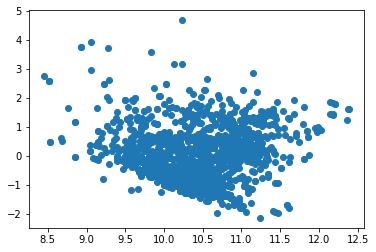

In [244]:
plt.scatter(lm.predict(), lm.resid)

## Mean zero

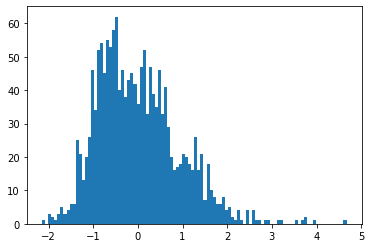

In [245]:
plt.hist(lm.resid, bins = 100)
plt.show()

In [246]:
lm.resid.mean().round(decimals = 10)

0.0

## Uncorrelated with regressors and predictions

In [247]:
df2 = df.assign(resid = lm.resid, pred = lm.predict())
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,resid,pred
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,-0.711449,10.111449
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,-0.578564,10.378564
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,-0.517311,10.317311
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,-0.106747,9.906747
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,-0.711449,10.111449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,-0.421932,10.921932
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0.100274,11.099726
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0.135273,10.864727
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,-0.768487,10.968487


In [248]:
lm = smf.ols(formula = 'resid ~ density + pH + sulphates', data = df2).fit()
lm.params.round(decimals = 10)

Intercept   -0.0
density      0.0
pH           0.0
sulphates   -0.0
dtype: float64

In [249]:
lm = smf.ols(formula = 'resid ~ pred', data = df2).fit()
lm.params.round(decimals = 10)

Intercept    0.0
pred        -0.0
dtype: float64

## Constant variance

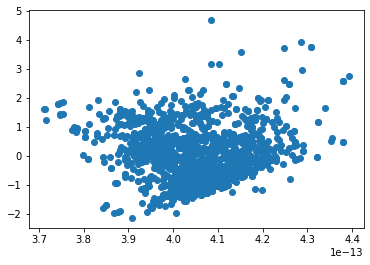

In [250]:
plt.scatter(lm.predict(),lm.resid)

# 7. Dummies

In [267]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [266]:
lm = smf.ols(formula = 'alcohol ~ C(quality)', data = df).fit()
lm.params

Intercept          9.955000
C(quality)[T.4]    0.310094
C(quality)[T.5]   -0.055294
C(quality)[T.6]    0.674519
C(quality)[T.7]    1.510913
C(quality)[T.8]    2.139444
dtype: float64

In [268]:
df[df['quality'] == 3].alcohol.mean()

9.955000000000002

In [271]:
df[df['quality'] == 4].alcohol.mean() - df[df['quality'] == 3].alcohol.mean()

0.310094339622637

In [272]:
lm = smf.ols(formula = 'alcohol ~ C(quality) + density + pH + sulphates', data = df).fit()
lm.params

Intercept          226.780549
C(quality)[T.4]      0.107937
C(quality)[T.5]     -0.092447
C(quality)[T.6]      0.499308
C(quality)[T.7]      1.215296
C(quality)[T.8]      1.652846
density           -219.895465
pH                   0.672050
sulphates            0.401116
dtype: float64

# 8. Logs

In [292]:
log_lm = smf.ols(formula = 'np.log(alcohol) ~ pH', data = df).fit()
log_lm.params['pH']

0.1320970359124645

In [293]:
(log_lm.predict(exog = {'pH':2}) - log_lm.predict(exog = {'pH':1})) / log_lm.predict(exog = {'pH':1})

0    0.064953
dtype: float64

In [294]:
lm = smf.ols(formula = 'alcohol ~ density + pH + sulphates', data = df).fit()

In [295]:
lm.ssr

1308.2020568450328

In [296]:
((lm.predict() - df.alcohol) ** 2).sum()

1308.2020568450325

# 9. Omitted variable bias

**OVB** =
- Effect of treatment in short - effect of treatment in long 
- beta short - beta long 
- relationship between omitted and treatment x effect of omitted in long

In [297]:
long_lm = smf.ols(formula = 'alcohol ~ density + pH', data = df).fit()
short_lm = smf.ols(formula = 'alcohol ~ density', data = df).fit()
omi_lm = smf.ols(formula = 'pH ~ density', data = df).fit()

In [298]:
short_lm.params['density'] - long_lm.params['density']

-7.883208090269761

In [299]:
omi_lm.params['density'] * long_lm.params['pH']

-7.883208090268045

# 10. Interaction term and additive

In [300]:
lm = smf.ols(formula = 'alcohol ~ density + pH', data = df).fit()
lm.params

Intercept    280.883942
density     -272.280615
pH             0.282032
dtype: float64

In [301]:
lm = smf.ols(formula = 'alcohol ~ density * pH', data = df).fit()
lm.params

Intercept    -1881.136645
density       1897.270105
pH             656.219421
density:pH    -658.241156
dtype: float64

# 11. Polynomial

In [302]:
lm = smf.ols(formula = 'alcohol ~ density + np.power(pH,2)', data = df).fit()
lm.params

Intercept          280.395328
density           -271.373551
np.power(pH, 2)      0.047176
dtype: float64

In [303]:
lm = smf.ols(formula = 'alcohol ~ density + I(pH**2)', data = df).fit()
lm.params

Intercept     280.395328
density      -271.373551
I(pH ** 2)      0.047176
dtype: float64

# 12. Collinearity

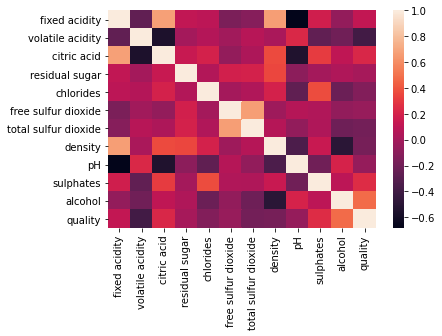

In [304]:
sns.heatmap(data = df.corr())

# Outliers and high leverages

## VIF - Variance inflation factor 

In [305]:
statsmodels.stats.outliers_influence.variance_inflation_factor

<function statsmodels.stats.outliers_influence.variance_inflation_factor(exog, exog_idx)>

# Plots

In [307]:
sm.graphics

<module 'statsmodels.graphics.api' from '/Users/boyuan/anaconda3/envs/sds/lib/python3.8/site-packages/statsmodels/graphics/api.py'>

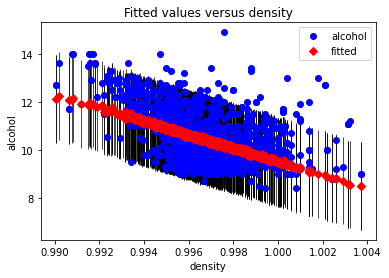

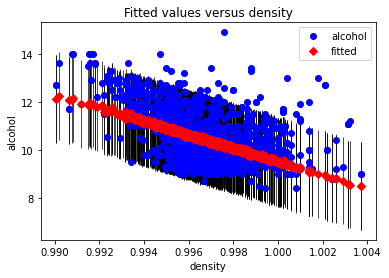

In [306]:
sm.graphics.plot_fit(lm,'density')

# Regularization

# From scratch

## Simple regression

In [82]:
def predict(alpha: float, beta: float, x_i: float) -> float:
    return beta * x_i + alpha 

def error(alpha: float, beta: float, x_i: float, y_i: float) -> float:
    '''The error from predicting beta * x_i + alpha when the actual value is y_i'''
    return predict(alpha, beta, x_i) - y_i

def sum_of_sqerrors(alpha: float, beta: float, x: List[float], y: List[float]) -> float:
    return sum(error(alpha, beta, x_i, y_i) ** 2
               for x_i, y_i in zip(x, y))

In [83]:
def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"

    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0    # if no variation, correlation is zero

def least_squares_fit(x: List[float], y: List[float]) -> Tuple[float, float]:
    '''Given two vectors x and y, find the least-squares values of alpha and beta'''
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

In [84]:
x = [i for i in range(-100, 110, 10)]
y = [3 * i - 5 for i in x]

least_squares_fit(x, y)

(-5.0, 3.0)

In [85]:
def total_sum_of_squares(y: List[float]) -> float:
    '''the total squared variation of y_i from their mean'''
    return sum(v ** 2 for v in de_mean(y))

def r_squared(alpha: float, beta: float, x: List[float], y: List[float]) -> float:
    '''the fraction of variation in y captured by the model, which equals 1 - the fraction of variation in y not captured by the model'''
    return 1 - (sum_of_sqerrors(alpha, beta, x, y) / total_sum_of_squares(y))

In [86]:
def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

In [87]:
num_epochs = 10000
random.seed(0)

guess = [random.random(), random.random()]
learning_rate = 0.00001

with tqdm.trange(num_epochs) as t:
    for _ in t:
        alpha, beta = guess
        
        # partial derivative of loss with respect to alpha 
        grad_a = sum(2 * error(alpha, beta, x_i, y_i)
                     for x_i, y_i in zip(x, y))
        # partial derivative of loss with respect to beta 
        grad_b = sum(2 * error(alpha, beta, x_i, y_i) * x_i
                     for x_i, y_i in zip(x, y))
        # compute loss
        loss = sum_of_sqerrors(alpha, beta, x, y)
        t.set_description(f"loss: {loss:.3f}")
        # update guess
        guess = gradient_step(guess, [grad_a, grad_b], -learning_rate)

alpha, beta = guess
alpha, beta

loss: 58.661:  29%|██▉       | 2923/10000 [00:02<00:05, 1225.88it/s] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

loss: 1.544:  73%|███████▎  | 7261/10000 [00:05<00:02, 1173.46it/s] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

loss: 0.161: 100%|██████████| 10000/10000 [00:07<00:00, 1289.30it/s]


(-4.912436809607385, 2.9999999999999996)

## Multiple regression

In [88]:
def predict(x: Vector, beta: Vector) -> float:
    '''assumes that the first element of x is 1'''
    return dot(x, beta)

In [89]:
def error(x: Vector, y: float, beta: Vector) -> float:
    return predict(x, beta) - y

def squared_error(x: Vector, y: float, beta: Vector) -> float:
    return error(x, y, beta) ** 2

In [90]:
x = [1,2,3]
y = 30
beta = [4,4,4]
error(x, y, beta)

-6

In [91]:
def sqerror_gradient(x: Vector, y: float, beta: Vector) -> Vector:
    err = error(x, y, beta)
    return [2 * err * x_i for x_i in x]

sqerror_gradient(x, y, beta)

[-12, -24, -36]

In [92]:
def vector_sum(vectors: List[Vector]) -> Vector:
    """Sums all corresponding elements"""
    # Check that vectors is not empty
    assert vectors, "no vectors provided!"

    # Check the vectors are all the same size
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"

    # the i-th element of the result is the sum of every vector[i]
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]

def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]

assert scalar_multiply(2, [1, 2, 3]) == [2, 4, 6]

def vector_mean(vectors: List[Vector]) -> Vector:
    """Computes the element-wise average"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

In [93]:
def least_squares_fit(xs: List[Vector],
                      ys: List[float],
                      learning_rate: float = 0.001,
                      num_steps: int = 1000,
                      batch_size: int = 1) -> Vector:
    '''Find the beta that minimizes the sum of squared errors assuming the model y = dot(x, beta)'''
    # Start with random guess
    guess = [random.random() for _ in xs[0]]
    
    for _ in tqdm.trange(num_steps, desc = 'least squares fit'):
        for start in range(0, len(xs), batch_size):
            batch_xs = xs[start: start + batch_size]
            batch_ys = ys[start: start + batch_size]
            
            gradient = vector_mean([sqerror_gradient(x, y, guess)
                                    for x, y in zip(batch_xs, batch_ys)])
            guess = gradient_step(guess, gradient, -learning_rate)
    return guess

In [94]:
def multiple_r_squared(xs: List[Vector], ys: Vector, beta: Vector) -> float:
    sum_of_squared_errors = sum(error(x, y, beta) ** 2
                                for x, y, in zip(xs, ys))
    return 1 - sum_of_squared_errors / total_sum_of_squared(ys)

### Bootstrap

In [95]:
X = TypeVar('X')
Stat = TypeVar('Stat')

def bootstrap_sample(data: List[X]) -> List[X]:
    '''randomly samples len(data) elements with replacement'''
    return [random.choice(data) for _ in data]

def bootstrap_statistic(data: List[X],
                        stats_fn: Callable[[List[X]], Stat],
                        num_samples: int) -> List[Stat]:
    '''evaluates stats_fn on num_samples bootstrap samples from data'''
    return [stats_fn(bootstrap_sample(data)) for _ in range(num_samples)]

In [96]:
close_to_100 = [99.5 + random.random() for _ in range(101)]

far_from_100 = ([99.5 + random.random()] + 
                [random.random() for _ in range(50)] + 
                [200 + random.random() for _ in range(50)])

In [97]:
np.median(close_to_100), np.median(far_from_100)

(100.08761706417543, 100.23148922079085)

In [98]:
def _median_odd(xs: List[float]) -> float:
    """If len(xs) is odd, the median is the middle element"""
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
    """If len(xs) is even, it's the average of the middle two elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2  # e.g. length 4 => hi_midpoint 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
    """Finds the 'middle-most' value of v"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

(array([ 4.,  0., 15., 12., 33., 26.,  7.,  1.,  1.,  1.]),
 array([ 99.99357787, 100.01474842, 100.03591897, 100.05708953,
        100.07826008, 100.09943063, 100.12060119, 100.14177174,
        100.16294229, 100.18411285, 100.2052834 ]),
 <a list of 10 Patch objects>)

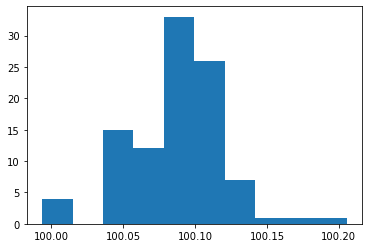

In [99]:
plt.hist(bootstrap_statistic(close_to_100, median, 100))

(array([49.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0., 45.]),
 array([  0.67620178,  20.6345043 ,  40.59280681,  60.55110933,
         80.50941184, 100.46771435, 120.42601687, 140.38431938,
        160.3426219 , 180.30092441, 200.25922692]),
 <a list of 10 Patch objects>)

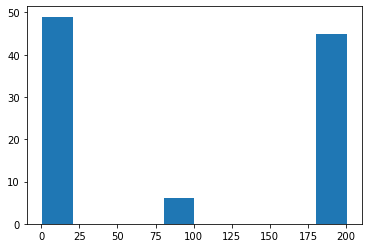

In [100]:
plt.hist(bootstrap_statistic(far_from_100, median, 100))

### Standard errors of coefficients

In [101]:
def estimate_sample_beta(pairs: List[Tuple[Vector, float]]):
    x_sample = [x for x, _ in pairs]
    y_sample = [y for _, y in pairs]
    beta = least_squares_fit(x_sample, y_sample, learning_rate, 5000, 25)
    print('bootstrap sample', beta)
    return beta

In [102]:
random.seed(0)
bootstrap_betas = bootstrap_statistic(list(zip(inputs, daily_minutes_good)), estimate_sample_beta, 100)

NameError: name 'inputs' is not defined

In [ ]:
bootstrap_standard_errors = [standard_deviation([beta[i] for beta in bootstrap_betas])
                             for i in range(4)]
print(bootstrap_standard_errors)

In [ ]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

def p_value(beta_hat_j: float, sigma_hat_j: float) -> float:
    if beta_hat_j > 0:
        return 2 * (1 - normal_cdf(beta_hat_j / sigma_hat_j))
    else:
        return 2 * normal_cdf(beta_hat_j / sigma_hat_j)

## Regularization

In [ ]:
def ridge_penalty(beta: Vector, alpha: float) -> float:
    return alpha * dot(beta[1:], beta[1:])

In [ ]:
def squared_error_ridge(x: Vector,
                        y: float,
                        beta: Vector,
                        alpha: float) -> float:
    '''estimate error plus ridge penalty on beta'''
    return error(x, y, beta) ** 2 + ridge_penalty(beta, alpha)

In [ ]:
def ridge_penalty_gradient(beta: Vector, alpha: float) -> Vector:
    '''gradient of just the ridge penalty'''
    return [0.] + [2 * alpha * beta_j for beta_j in beta[1:]]

def sqerror_ridge_gradient(x: Vector,
                           y: float,
                           beta: Vector,
                           alpha: float) -> Vector:
    '''the gradient corresponding to the ith squared error term including the ridge penalty'''
    return add(sqerror_gradient(x, y, beta),
               ridge_penalty_gradient(beta, alpha))

In [ ]:
def lasso_penalty(beta, alpha):
    return alpha * sum(abs(beta_i) for beta_i in beta[1:])